<a href="https://colab.research.google.com/github/vadize/vadize.github.io/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define paths to your image directories
fword_dir = '/content/drive/MyDrive/fwordimage/'
nword_dir = '/content/drive/MyDrive/nwordimage/'

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Set image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Create training and validation datasets
train_dataset = datagen.flow_from_directory(
    '/content/drive/My Drive/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_dataset = datagen.flow_from_directory(
    '/content/drive/My Drive/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

#CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_dataset)
print("Test accuracy:", test_accuracy)

# Save the model
model.save('/content/drive/My Drive/binary_classifier_model.h5')


Found 397 images belonging to 3 classes.
Found 99 images belonging to 3 classes.
Epoch 1/10
13/13 [==============================] - 25s 2s/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 25s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 25s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 21s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
13/13 [=================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


-----------train complete--------------


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/binary_classifier_model.h5')


In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the pixel values
    return img

# Load an example "fword" image
fword_image_path = os.path.join(fword_dir, 'image_12.jpg')
fword_img = load_and_preprocess_image(fword_image_path)

# Load an example "nword" image
nword_image_path = os.path.join(nword_dir, 'image_34.jpg')
nword_img = load_and_preprocess_image(nword_image_path)


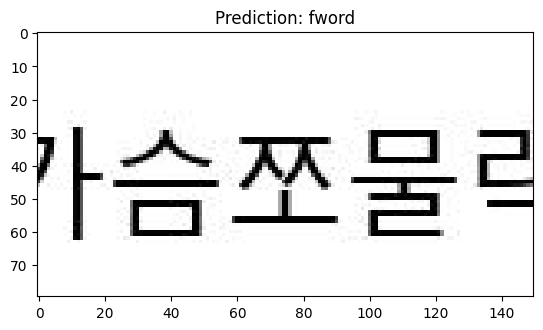

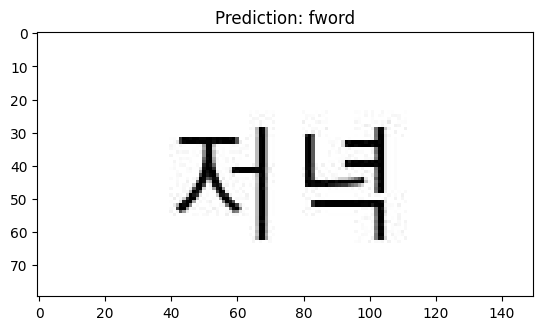

In [ ]:
# Define a function to display the image and the prediction result
def show_image_with_prediction(image_path, prediction, class_names):
    plt.figure()
    img = image.load_img(image_path)
    plt.imshow(img)

    # Extract the prediction value as a float and round it
    prediction_value = float(prediction[0])

    # Use the rounded prediction to index the class_names
    predicted_class = class_names[int(round(prediction_value))]

    plt.title(f"Prediction: {predicted_class}")

class_names = ['nword', 'fword']
show_image_with_prediction(fword_image_path, fword_prediction, class_names)
show_image_with_prediction(nword_image_path, nword_prediction, class_names)
plt.show()
